<a href="https://colab.research.google.com/github/MiteshBhanushali/YesBankCloseStockPrice/blob/main/Yes_Bank_Closing_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

Time Series forecasting & modeling plays an important role in data analysis. Time series analysis is a specialized branch of statistics used extensively in fields such as Econometrics & Operation Research.

Time Series is being widely used in analytics & data science. This problem of Yes Bank Stock Price is essentially a time series problem as we need to forecast traffic here.

#Understanding the Problem Statement

Here in this problem set first it’s important to establish what we’re aiming to solve. Broadly, stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance. Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.

our focus will be on the technical analysis part. We’ll be using a dataset of Yes Bank Stock price for this particular project.

#Importing important libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns                            # more plots
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product                   # some useful functions
from tqdm import tqdm_notebook

**Mounting the drive and importing the dataset**

In [ ]:
#Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/yes_bank_analysis/data_YesBank_StockPrices.csv'
stock_data=pd.read_csv(path)

**Let us now view first few rows of the dataset**

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
stock_data.shape

(185, 5)

In [ ]:
stock_data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
stock_data_copy=stock_data.copy()

In [ ]:
stock_data_copy=stock_data_copy[['Date','Close']]

In [ ]:
stock_data_copy

,Date,Close
0,Jul-05,12.46
1,Aug-05,13.42
2,Sep-05,13.30
3,Oct-05,12.99
4,Nov-05,13.41
...,...,...
180,Jul-20,11.95
181,Aug-20,14.37
182,Sep-20,13.15
183,Oct-20,12.42


In [ ]:
stock_data_copy['Date']='01-'+stock_data_copy['Date']

In [ ]:
stock_data_copy.head()

,Date,Close
0,01-Jul-05,12.46
1,01-Aug-05,13.42
2,01-Sep-05,13.30
3,01-Oct-05,12.99
4,01-Nov-05,13.41


In [ ]:
stock_data_copy.tail(5)

,Date,Close
180,01-Jul-20,11.95
181,01-Aug-20,14.37
182,01-Sep-20,13.15
183,01-Oct-20,12.42
184,01-Nov-20,14.67


In [ ]:
stock_data_copy['Date'] = pd.to_datetime(stock_data_copy['Date'])   #Changing it to datetime datatype

In [ ]:
stock_data_copy['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [ ]:
stock_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [ ]:
stock_data_copy.set_index(['Date'],inplace = True)  #Changing index to date
stock_data_copy.head()

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41


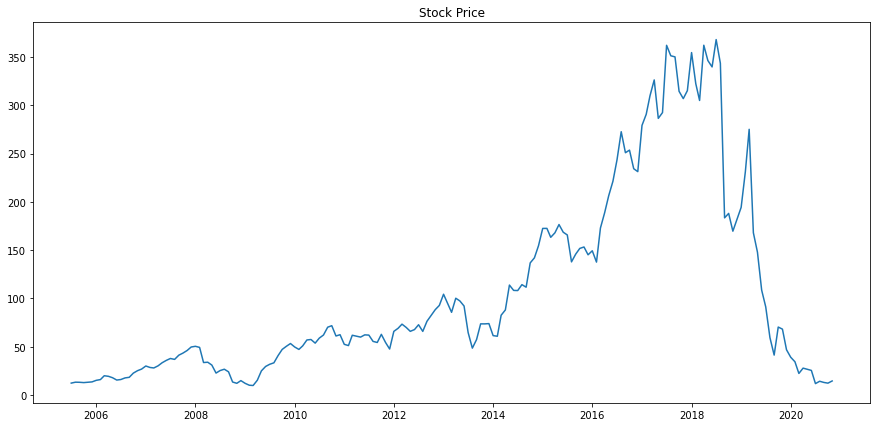

In [ ]:
#Line Graph of Stock Close price over time
plt.figure(figsize=(15, 7))
plt.plot(stock_data_copy)
plt.title('Stock Price')
plt.show()

Prophet

In [ ]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#Spliting dataset to test and train
split_date = '2014-01-01'
stock_price_train = stock_data_copy.loc[stock_data_copy.index <= split_date].copy()
stock_price_test = stock_data_copy.loc[stock_data_copy.index > split_date].copy()

In [ ]:
stock_price_train.shape

(103, 1)

In [ ]:
stock_price_test.shape

(82, 1)

In [ ]:
# Setup and train model and fit
model = Prophet()
model.fit(stock_price_train.reset_index() \
              .rename(columns={'Date':'ds',
                               'Close':'y'}))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Predict on training set with model
stock_price_test_fcst = model.predict(df=stock_price_test.reset_index() \
                                   .rename(columns={'Date':'ds'}))

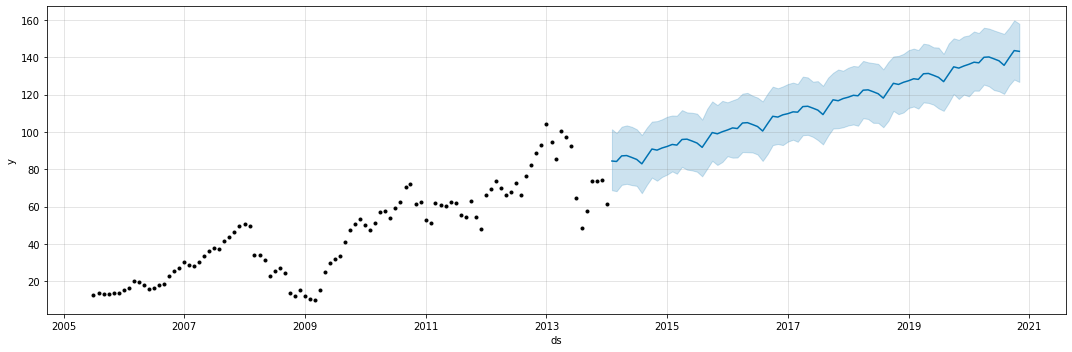

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(stock_price_test_fcst,
                 ax=ax)
plt.show()

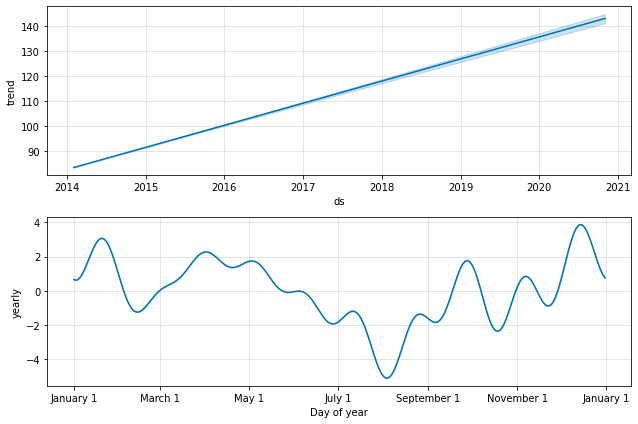

In [ ]:
# Plot the components of the model
fig = model.plot_components(stock_price_test_fcst)

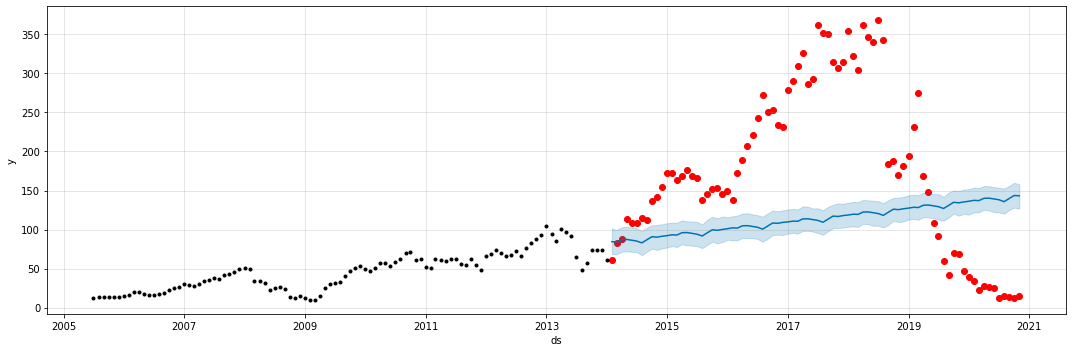

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(stock_price_test.index, stock_price_test['Close'], color='r')
fig = model.plot(stock_price_test_fcst, ax=ax)

Creating multipel lag columns and creating regression model

In [ ]:
data = pd.DataFrame(stock_data.copy())
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
data['Date']='01-'+data['Date']
data.head(1)

,Date,Open,High,Low,Close
0,01-Jul-05,13.0,14.0,11.25,12.46


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index(['Date'],inplace = True)
data.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
stock_data_copy1=stock_data_copy.copy()
stock_data_copy1.rename(columns = {'Close':'y'},inplace=True)
stock_data_copy1

,y
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41
...,...
2020-07-01,11.95
2020-08-01,14.37
2020-09-01,13.15


In [ ]:
for i in range(6, 25):
    stock_data_copy1["lag_{}".format(i)] = stock_data_copy1.y.shift(i)

In [ ]:
stock_data_copy1 = pd.merge(stock_data_copy1,data[['Open','High','Low']], on='Date', how='outer')
stock_data_copy1.tail(5)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,...,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,Open,High,Low
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,11.95,39.20,46.95,68.30,70.45,41.45,59.50,91.30,108.70,147.95,...,194.30,181.75,169.65,188.05,183.45,343.40,367.90,25.60,28.30,11.10
2020-08-01,14.37,34.55,39.20,46.95,68.30,70.45,41.45,59.50,91.30,108.70,...,231.20,194.30,181.75,169.65,188.05,183.45,343.40,12.00,17.16,11.85
2020-09-01,13.15,22.45,34.55,39.20,46.95,68.30,70.45,41.45,59.50,91.30,...,275.05,231.20,194.30,181.75,169.65,188.05,183.45,14.30,15.34,12.75
2020-10-01,12.42,27.95,22.45,34.55,39.20,46.95,68.30,70.45,41.45,59.50,...,168.00,275.05,231.20,194.30,181.75,169.65,188.05,13.30,14.01,12.11
2020-11-01,14.67,26.85,27.95,22.45,34.55,39.20,46.95,68.30,70.45,41.45,...,147.95,168.00,275.05,231.20,194.30,181.75,169.65,12.41,14.90,12.21


In [ ]:
stock_data_copy1

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,...,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,Open,High,Low
Date,,,,,,,,,,,,,,,,,,,,,
2005-07-01,12.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.00,14.00,11.25
2005-08-01,13.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.58,14.88,12.55
2005-09-01,13.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.48,14.87,12.27
2005-10-01,12.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.20,14.47,12.40
2005-11-01,13.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.35,13.88,12.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,11.95,39.20,46.95,68.30,70.45,41.45,59.50,91.30,108.70,147.95,...,194.30,181.75,169.65,188.05,183.45,343.40,367.90,25.60,28.30,11.10
2020-08-01,14.37,34.55,39.20,46.95,68.30,70.45,41.45,59.50,91.30,108.70,...,231.20,194.30,181.75,169.65,188.05,183.45,343.40,12.00,17.16,11.85
2020-09-01,13.15,22.45,34.55,39.20,46.95,68.30,70.45,41.45,59.50,91.30,...,275.05,231.20,194.30,181.75,169.65,188.05,183.45,14.30,15.34,12.75


In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
y = stock_data_copy1.dropna().y
X = stock_data_copy1.dropna().drop(['y'], axis=1)

In [ ]:
split_date = '2014-12-01'
X_train = X.loc[X.index <= split_date].copy()
X_test = X.loc[X.index > split_date].copy()
y_train = y.loc[y.index <= split_date].copy()
y_test = y.loc[y.index > split_date].copy()

In [ ]:
X_train

,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,...,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,Open,High,Low
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-01,30.16,26.97,25.32,22.78,18.46,17.84,16.16,15.62,18.03,19.49,...,15.33,13.71,13.41,12.99,13.30,13.42,12.46,35.98,41.04,35.02
2007-08-01,28.63,30.16,26.97,25.32,22.78,18.46,17.84,16.16,15.62,18.03,...,16.12,15.33,13.71,13.41,12.99,13.30,13.42,37.50,39.00,30.20
2007-09-01,28.14,28.63,30.16,26.97,25.32,22.78,18.46,17.84,16.16,15.62,...,20.08,16.12,15.33,13.71,13.41,12.99,13.30,37.40,41.75,35.30
2007-10-01,30.31,28.14,28.63,30.16,26.97,25.32,22.78,18.46,17.84,16.16,...,19.49,20.08,16.12,15.33,13.71,13.41,12.99,41.80,47.30,33.60
2007-11-01,33.51,30.31,28.14,28.63,30.16,26.97,25.32,22.78,18.46,17.84,...,18.03,19.49,20.08,16.12,15.33,13.71,13.41,44.40,50.98,40.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,60.95,61.59,74.02,73.74,73.76,57.50,48.65,64.76,92.20,97.49,...,94.50,104.41,92.84,88.48,82.29,76.44,65.97,107.40,118.69,103.31
2014-09-01,82.70,60.95,61.59,74.02,73.74,73.76,57.50,48.65,64.76,92.20,...,85.71,94.50,104.41,92.84,88.48,82.29,76.44,114.60,126.85,107.18
2014-10-01,88.14,82.70,60.95,61.59,74.02,73.74,73.76,57.50,48.65,64.76,...,100.28,85.71,94.50,104.41,92.84,88.48,82.29,112.10,137.80,109.20


In [ ]:
X_test

,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,...,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,Open,High,Low
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,108.21,108.38,113.89,88.14,82.70,60.95,61.59,74.02,73.74,73.76,...,64.76,92.20,97.49,100.28,85.71,94.50,104.41,154.40,179.00,150.47
2015-02-01,114.33,108.21,108.38,113.89,88.14,82.70,60.95,61.59,74.02,73.74,...,48.65,64.76,92.20,97.49,100.28,85.71,94.50,172.50,173.88,156.10
2015-03-01,111.70,114.33,108.21,108.38,113.89,88.14,82.70,60.95,61.59,74.02,...,57.50,48.65,64.76,92.20,97.49,100.28,85.71,174.80,182.00,156.80
2015-04-01,136.83,111.70,114.33,108.21,108.38,113.89,88.14,82.70,60.95,61.59,...,73.76,57.50,48.65,64.76,92.20,97.49,100.28,162.80,172.80,154.53
2015-05-01,142.08,136.83,111.70,114.33,108.21,108.38,113.89,88.14,82.70,60.95,...,73.74,73.76,57.50,48.65,64.76,92.20,97.49,170.00,176.96,157.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,39.20,46.95,68.30,70.45,41.45,59.50,91.30,108.70,147.95,168.00,...,194.30,181.75,169.65,188.05,183.45,343.40,367.90,25.60,28.30,11.10
2020-08-01,34.55,39.20,46.95,68.30,70.45,41.45,59.50,91.30,108.70,147.95,...,231.20,194.30,181.75,169.65,188.05,183.45,343.40,12.00,17.16,11.85
2020-09-01,22.45,34.55,39.20,46.95,68.30,70.45,41.45,59.50,91.30,108.70,...,275.05,231.20,194.30,181.75,169.65,188.05,183.45,14.30,15.34,12.75


In [ ]:
y_train

Date
2007-07-01     37.93
2007-08-01     36.99
2007-09-01     41.36
2007-10-01     43.48
2007-11-01     46.18
               ...  
2014-08-01    114.33
2014-09-01    111.70
2014-10-01    136.83
2014-11-01    142.08
2014-12-01    154.57
Name: y, Length: 90, dtype: float64

In [ ]:
y_test

Date
2015-01-01    172.50
2015-02-01    172.55
2015-03-01    163.31
2015-04-01    167.96
2015-05-01    176.52
               ...  
2020-07-01     11.95
2020-08-01     14.37
2020-09-01     13.15
2020-10-01     12.42
2020-11-01     14.67
Name: y, Length: 71, dtype: float64

In [ ]:
from matplotlib.legend import Legend

def train_model(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)
  pred_value=model.predict(x_test)
  MSE=mean_squared_error(y_test,pred_value)
  RMSE=np.sqrt(MSE)
  r2=r2_score(y_test,pred_value)
  adj_r2=1-(1-r2_score(y_test,pred_value))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  print(f'Evaluation matrix-- \n MSE: {MSE}\n RMSE: {RMSE}\n r2Scroe: {r2}\n adj_r2: {adj_r2}\n')
  print('Evaluation Graph')
  plt.figure(figsize=(20,8))
  p1=plt.plot(pred_value[:100])
  p2=plt.plot(np.array(y_test[:100]))
  plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
  plt.show()

In [ ]:
#Linear Reggression
lr = LinearRegression()

Evaluation matrix-- 
 MSE: 277.41941717262404
 RMSE: 16.655912378870873
 r2Scroe: 0.9769120998538598
 adj_r2: 0.9663301456202122

Evaluation Graph


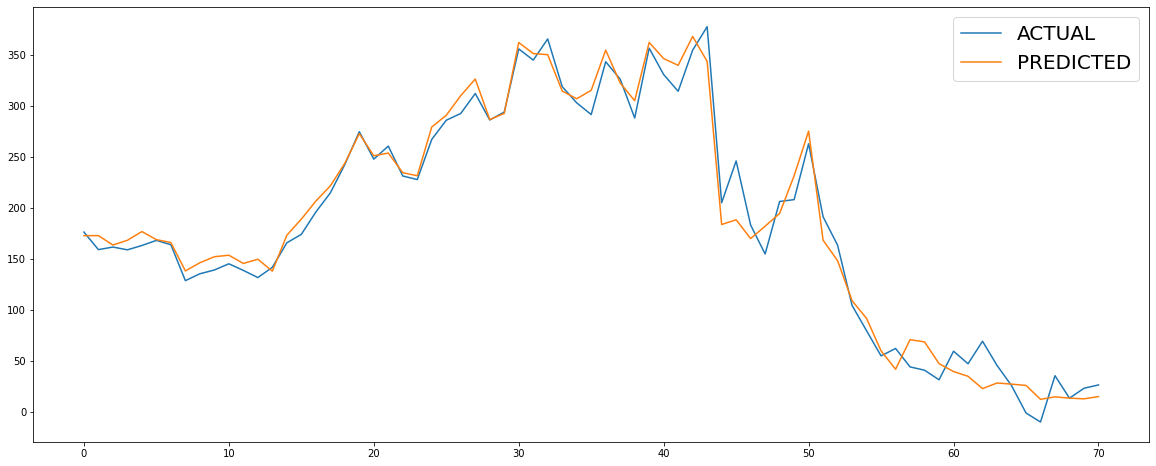

In [ ]:
train_model(lr,X_train,y_train,X_test,y_test)

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [ ]:
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)

Evaluation matrix-- 
 MSE: 11945.58569677665
 RMSE: 109.29586312746082
 r2Scroe: 0.0058428765902731605
 adj_r2: -0.4498124716391849

Evaluation Graph


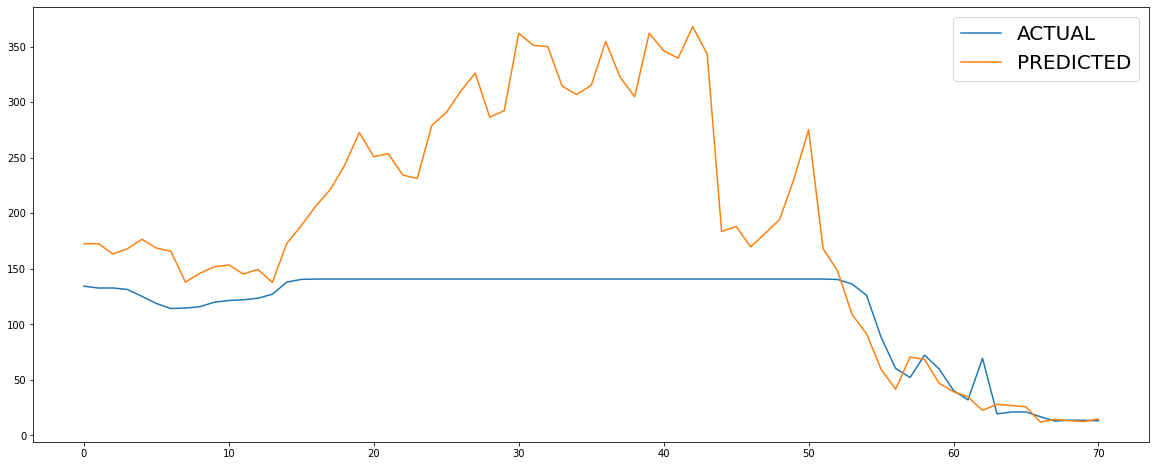

In [ ]:
train_model(rf_grid,X_train,y_train,X_test,y_test)

In [ ]:
optimal_rf_model=rf_grid.best_estimator_

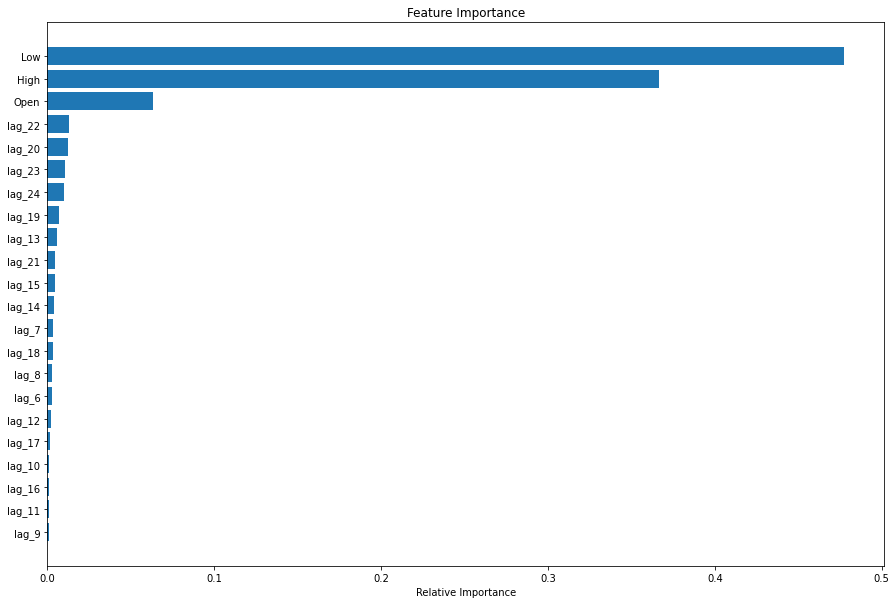

In [ ]:
X_imputed_df = pd.DataFrame(X_train, columns = X.columns)
features = X_imputed_df.columns
importances = optimal_rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# importing xgboost
import xgboost as xgb

In [ ]:
# trying to evaluate regression using xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

[09:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Evaluation matrix-- 
 MSE: 25827.01736097129
 RMSE: 160.70786340739923
 r2Scroe: -1.1494227187842814
 adj_r2: -2.1345747982270766

Evaluation Graph


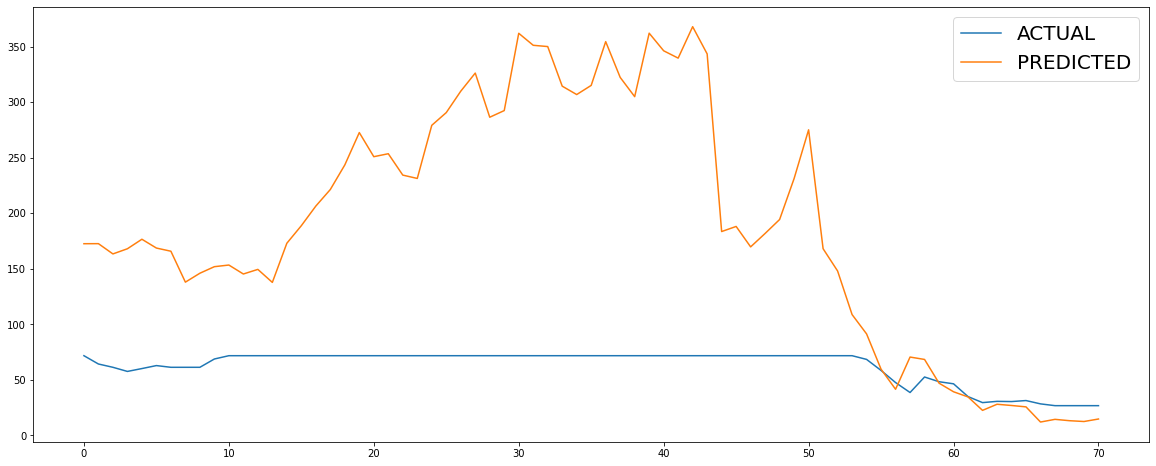

In [ ]:
# using created function to evaluate the xg_reg
train_model(xg_reg,X_train,y_train,X_test,y_test)

**From above graph its clear that on this Data xgboost is not working well .**